# Dream recordings

In this notebook I load EEG recording during sleep, and reuse the classifier trained on THINGS-EEG dataset

During EEG recording, I used a bandpass filter (0.5-30 Hz) and notch filter (50 Hz).<br>
Electrodes of the Unicorn Hybrid Black are : 'Fz', 'C3', 'Cz', 'C4', 'Pz', 'PO7', 'Oz', 'PO8'


MNE documentation : https://mne.tools/dev/auto_tutorials/simulation/10_array_objs.html

In [11]:
import mne
import numpy as np
import pandas as pd
import os

In [12]:
path = 'dream_data/dream1.csv'
df = pd.read_csv(path)

In [13]:
df

,EEG 1,EEG 2,EEG 3,EEG 4,EEG 5,EEG 6,EEG 7,EEG 8,Accelerometer X,Accelerometer Y,Accelerometer Z,Gyroscope X,Gyroscope Y,Gyroscope Z,Battery Level,Counter,Validation Indicator
0,2585.587,3497.905,382.427,5887.685,-5887.685,-1574.737,3777.639,-15.256,-0.818,0.510,-0.102,0.000,0.000,0.000,93.333,1.0,1.0
1,15510.509,23140.217,1725.056,41250.985,-41250.988,-11548.946,26240.219,-2612.208,-0.836,0.507,-0.114,0.000,0.000,0.000,93.333,2.0,1.0
2,42579.025,72403.575,4451.404,137739.393,-137739.405,-38579.172,88144.575,-16362.243,-0.838,0.506,-0.117,0.000,0.000,0.000,93.333,3.0,1.0
3,72174.372,146857.549,12737.432,299617.574,-299617.599,-78019.580,196871.638,-47846.337,-0.838,0.503,-0.120,0.000,0.000,0.000,93.333,4.0,1.0
4,83264.016,224578.621,37241.068,489993.259,-488984.491,-105356.966,337886.411,-86698.564,-0.844,0.502,-0.118,2.045,-2.411,-1.740,93.333,5.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3536611,9.408,8.993,6.477,6.281,7.571,-6.241,8.219,7.211,0.498,0.808,0.326,0.946,0.793,1.343,60.000,3536612.0,1.0
3536612,11.364,10.400,7.206,6.789,10.796,-9.247,11.384,10.237,0.499,0.808,0.326,1.038,0.885,1.434,60.000,3536613.0,1.0
3536613,12.204,10.929,7.652,7.244,11.779,-10.116,12.352,11.125,0.499,0.807,0.324,0.946,0.854,1.312,60.000,3536614.0,1.0
3536614,11.526,10.339,7.511,7.344,9.959,-8.359,10.575,9.373,0.500,0.806,0.325,1.038,0.885,1.282,60.000,3536615.0,1.0


In [14]:
unicorn_ch_names = ['Fz', 'C3', 'Cz', 'C4', 'Pz', 'PO7', 'Oz', 'PO8']


# Creating MNE objects 
ch_types = ['eeg'] * len(unicorn_ch_names)
sfreq = 250 
info = mne.create_info(ch_names=unicorn_ch_names, sfreq=sfreq, ch_types=ch_types)




In [15]:
data = df.loc[:, 'EEG 1':'EEG 8']
data = data / 1000000 # Unicorn returns uV, convert to V for MNE
data

,EEG 1,EEG 2,EEG 3,EEG 4,EEG 5,EEG 6,EEG 7,EEG 8
0,0.002586,0.003498,0.000382,0.005888,-0.005888,-0.001575,0.003778,-0.000015
1,0.015511,0.023140,0.001725,0.041251,-0.041251,-0.011549,0.026240,-0.002612
2,0.042579,0.072404,0.004451,0.137739,-0.137739,-0.038579,0.088145,-0.016362
3,0.072174,0.146858,0.012737,0.299618,-0.299618,-0.078020,0.196872,-0.047846
4,0.083264,0.224579,0.037241,0.489993,-0.488984,-0.105357,0.337886,-0.086699
...,...,...,...,...,...,...,...,...
3536611,0.000009,0.000009,0.000006,0.000006,0.000008,-0.000006,0.000008,0.000007
3536612,0.000011,0.000010,0.000007,0.000007,0.000011,-0.000009,0.000011,0.000010
3536613,0.000012,0.000011,0.000008,0.000007,0.000012,-0.000010,0.000012,0.000011
3536614,0.000012,0.000010,0.000008,0.000007,0.000010,-0.000008,0.000011,0.000009


Creating RawArray with float64 data, n_channels=8, n_times=3536616
    Range : 0 ... 3536615 =      0.000 ... 14146.460 secs
Ready.
Effective window size : 8.192 (s)


C:\Users\lizen\AppData\Local\Temp\ipykernel_10196\4063773309.py:6: RuntimeWarning: Channel locations not available. Disabling spatial colors.
  raw.plot_psd(average=False)


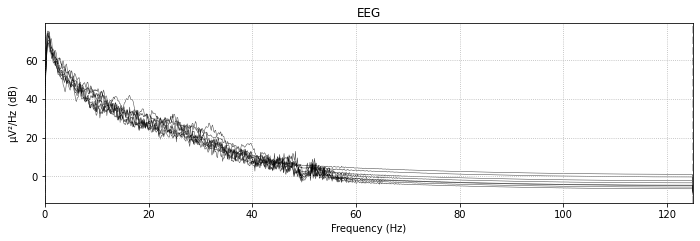

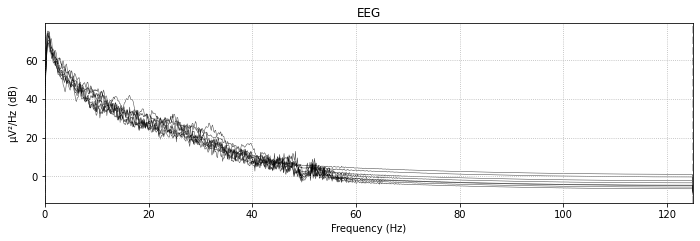

In [16]:
dream_data=data.transpose().to_numpy()
raw = mne.io.RawArray(dream_data, info)

#raw.notch_filter(freqs=[50, 150])  # higher ones are irrelevant because our top is 125 Hz
#raw.filter(l_freq=0.5, h_freq=125)
raw.plot_psd(average=False)